#### Практическое задание. Урок 7. Многомерный статистический анализ. Линейная регрессия

1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X = zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])

In [3]:
y = ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Считаем коэффициент b по формуле:

In [4]:
b1 = (np.mean(X*y) - np.mean(X)*np.mean(y)) / (np.mean(X**2) - np.mean(X)**2)
b1

2.620538882402765

Считаем коэффициент b вторым способом через n:

In [5]:
n = len(X)
n

10

In [6]:
b2 = (n*(np.sum(X*y)) - (np.sum(X)*np.sum(y))) / (n*(np.sum(X**2)) - ((np.sum(X)**2)))
b2

2.6205388824027653

Считаем коэффициент a по формуле:

In [7]:
a = np.mean(y) - b1*np.mean(X)
a

444.1773573243596

Строим модель (с интерсептом):

In [8]:
y_hat1 = 444.18 +2.62*X
y_hat1

array([535.88, 562.08, 941.98, 968.18, 548.98, 627.58, 585.66, 837.18,
       758.58, 732.38])

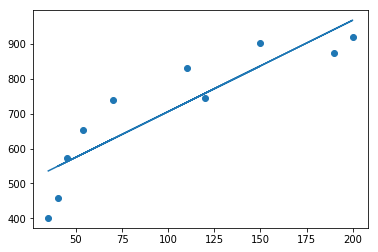

In [9]:
plt.scatter(X,y)
plt.plot(X, y_hat1)
plt.show()

Считаем коэффициенты без интерсепта (матричный метод):

Преобразовываем X и y в матричную форму:

In [10]:
X = X.reshape(n,1)
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [11]:
y = y.reshape(n,1)
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [12]:
b3 = np.dot(np.linalg.inv(np.dot(X.T,X)), X.T @ y)
b3

array([[5.88982042]])

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

Зададим формулу расчета средней квадратичной ошибки:

In [23]:
def mse_(B1, y=y, X=X, n=10):
    return np.sum((B1*X-y)**2/n)

In [63]:
# Дано:
# задаем шаг альфа
alpha = 1e-6
B1=0.1
n=10

In [69]:
for i in range(1000):
    B1 -= alpha*(2/n)*np.sum(B1*X-y)*X;
    if i%500==0:
        print('Iteration: {i}, B1={B1}, mse={mse}'.format(i=i, B1=B1, mse=mse_(B1)))

TypeError: mse_() missing 1 required positional argument: 'B1'

3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Ответ: для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа (z-критерий), когда заранее известно значение дисперсии.
    В случае, если оно не известно - используется t-критерий(таблица критических точек распределения Стьюдента).

4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [68]:
def mse_(B0, B1, y=y, X=X, n=10):
    return np.sum((B0+B1*X-y)**2/n)

In [72]:
# Дано:
# задаем шаг альфа
alpha = 1e-6
B0=0.1
B1=0.1
n=10

In [76]:
for i in range(1000):
    y_pred = B0+B1*X
    B0 -= alpha*(2/n)*np.sum(y_pred-y)
    B1 -= alpha*(2/n)*np.sum(y_pred-y)*X;
    if i%500==0:
        print('Iteration: {i}, B1={B1}, B1={B1}, mse={mse}'.format(i=i, B1=B1, mse=mse_(B0,B1)))

Iteration: 0, B1=[[0.28796195]
 [0.34166537]
 [1.12036489]
 [1.1740683 ]
 [0.31481366]
 [0.47592391]
 [0.38999844]
 [0.90555123]
 [0.74444098]
 [0.69073757]], B1=[[0.28796195]
 [0.34166537]
 [1.12036489]
 [1.1740683 ]
 [0.31481366]
 [0.47592391]
 [0.38999844]
 [0.90555123]
 [0.74444098]
 [0.69073757]], mse=405519.3223545319
Iteration: 500, B1=[[ 1.87738723]
 [ 2.38521215]
 [ 9.74867351]
 [10.25649843]
 [ 2.13129969]
 [ 3.65477445]
 [ 2.84225458]
 [ 7.71737382]
 [ 6.19389906]
 [ 5.68607414]], B1=[[ 1.87738723]
 [ 2.38521215]
 [ 9.74867351]
 [10.25649843]
 [ 2.13129969]
 [ 3.65477445]
 [ 2.84225458]
 [ 7.71737382]
 [ 6.19389906]
 [ 5.68607414]], mse=329992.10124943237
